In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount= True)

Mounted at /content/drive


In [ ]:
!git clone https://github.com/avinash3147/eva_pytorch_wrapper.git /content/drive/MyDrive/EVA6/eva_pytorch_wrapper

fatal: destination path '/content/drive/MyDrive/EVA6/eva_pytorch_wrapper' already exists and is not an empty directory.


In [ ]:
%cd "/content/drive/MyDrive/EVA6"

/content/drive/MyDrive/EVA6


## **Import Libraries**

In [ ]:
import cv2
import numpy as np

## **Load Yolo Alogorithm**
* To load yolo algorithm we need three files
  * **Weights file** it's the trained model, the core of algorithm to detect objects
  * **cfg file** it's the configuration file where all settings of algorithm are present
  * **Names File** contains names of object that algorithm can detect

In [ ]:
# Load Yolo
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg") # Load Yolo Model
classes = []
with open("coco.names", "r") as f: # Remove Trailing Spaces and add all classes to list
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames() # Get Layer names
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()] # Get output layers
colors = np.random.uniform(0, 255, size=(len(classes), 3))

## **Load Image**

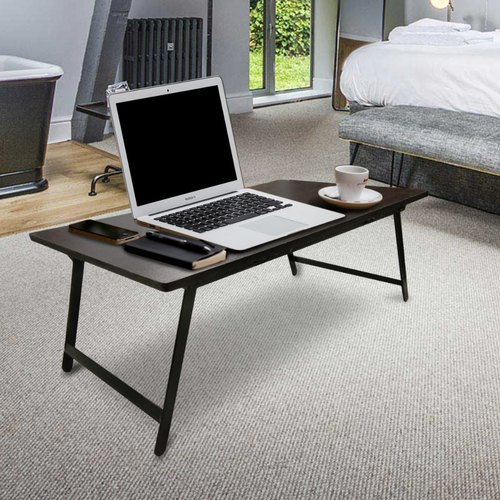

In [ ]:
# Loading image
img = cv2.imread("test_image.jpg") # Read image
cv2_imshow(img)
# img = cv2.resize(img, None, fx=0.4, fy=0.4) # 
height, width, channels = img.shape

## **Detecting Objects**

In [ ]:
# Detecting objects
blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False) # Give RGB channel blobs
net.setInput(blob)
outs = net.forward(output_layers) # forward blob to output layers

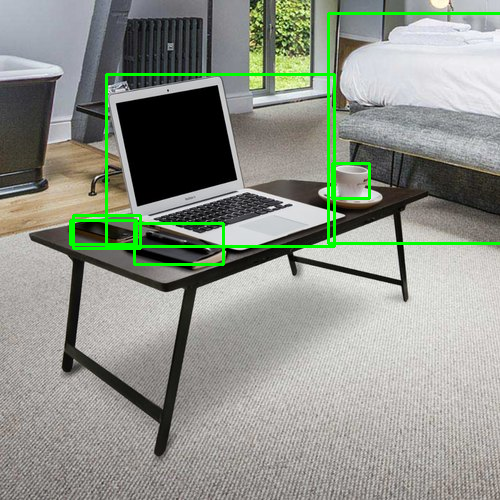

In [ ]:
# Showing informations on the screen
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7:
            # Object detected
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            # Rectangle coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

            cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2_imshow(img)

In [ ]:
number_objects_detected = len(boxes)
for i in range(len(boxes)):
  x, y, w, h = boxes[i]
  label = classes[class_ids[i]]
  print("******")
  print(label)

******
bed
******
laptop
******
cell phone
******
cell phone
******
cup
******
cell phone


In [ ]:
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)
print(indexes)

[[1]
 [4]
 [3]
 [0]
 [2]]


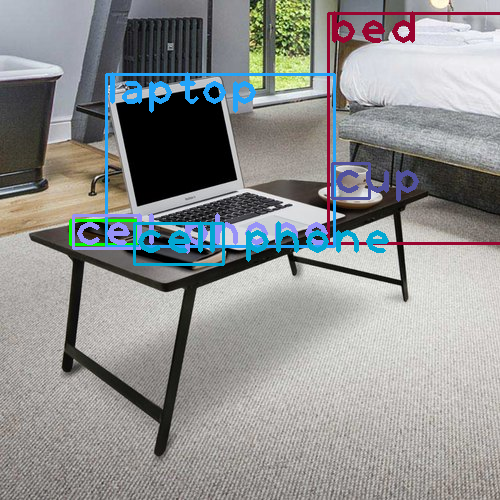

In [ ]:
from google.colab.patches import cv2_imshow

font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = str(classes[class_ids[i]])
        color = colors[i]
        cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
        cv2.putText(img, label, (x, y + 30), font, 3, color, 3)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()